In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
train_path = r'D:\gesture2\train'
test_path = r'D:\gesture2\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 7826 images belonging to 26 classes.
Found 7826 images belonging to 26 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

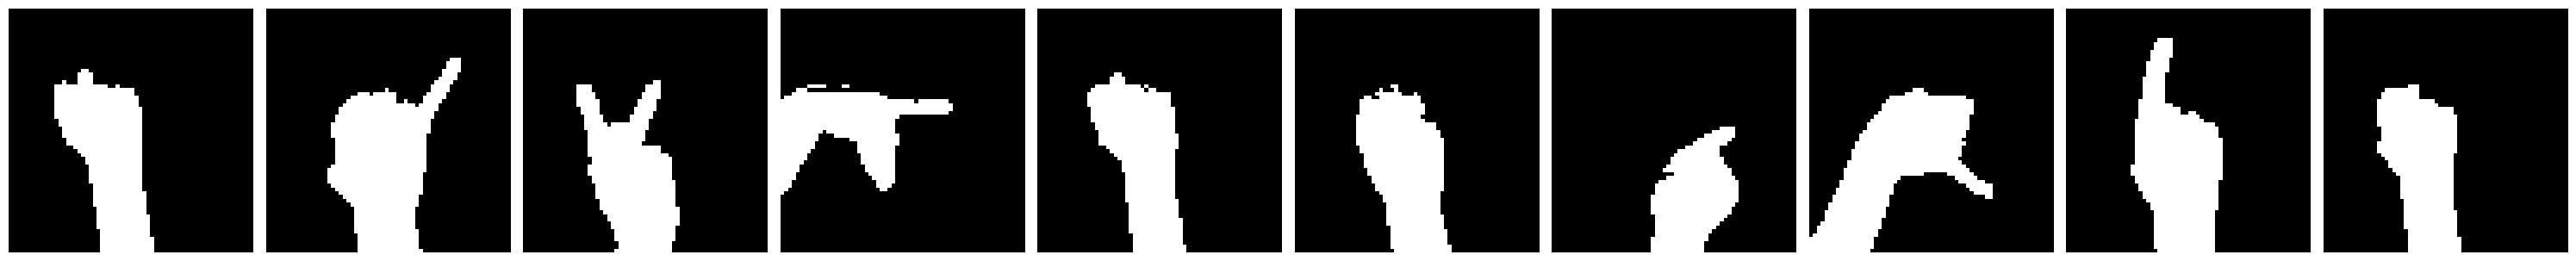

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]]


In [3]:
imgs, labels = next(train_batches)

#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(26,activation ="softmax"))

In [8]:
#model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=1, min_lr=0.0001)
#early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [9]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

Epoch 1/10
783/783 [==============================] - 101s 128ms/step - loss: 0.4260 - accuracy: 0.9298 - val_loss: 0.0029 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
783/783 [==============================] - 40s 51ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
783/783 [==============================] - 39s 49ms/step - loss: 9.7919e-04 - accuracy: 1.0000 - val_loss: 7.5087e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
783/783 [==============================] - 47s 60ms/step - loss: 6.5694e-04 - accuracy: 1.0000 - val_loss: 5.4290e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
783/783 [==============================] - 47s 60ms/step - loss: 4.8993e-04 - accuracy: 1.0000 - val_loss: 4.2137e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
783/783 [==============================] - 43s 55ms/step - loss: 3.8769e-04 - accuracy: 1.0000 - val_loss: 3.4585e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
783/783 [====

In [10]:
imgs, labels = next(train_batches) # For getting next batch of imgs...
print(len(imgs))
print(len(labels))

10
10


In [11]:
imgs, labels = next(test_batches) # For getting next batch of imgs...
print(len(imgs))
print(len(labels))

10
10


In [12]:
scores = model.evaluate(imgs, labels,verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

#model.save('best_model_dataflair.h5')
model.save('model.h5')

loss of 0.0001148464871221222; accuracy of 100.0%


In [13]:
print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"model.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


{'loss': [0.4260401725769043, 0.001978261861950159, 0.000979188596829772, 0.000656941207125783, 0.0004899280029349029, 0.0003876877308357507, 0.0003208146372344345, 0.0002800489019136876, 0.0002591682714410126, 0.0002414760529063642], 'accuracy': [0.9298492074012756, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.0029216513503342867, 0.0012124693021178246, 0.0007508668932132423, 0.0005429034936241806, 0.0004213707579765469, 0.0003458451246842742, 0.00028983052470721304, 0.00026605313178151846, 0.00024738782667554915, 0.00023124895233195275], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0005, 0.0005, 0.0005]}
loss of 0.00015281958621926606; accuracy of 100.0%
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                  

['loss', 'accuracy']

predictions on a small set of test data--

H   E   V   G   X   Y   T   O   J   A   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

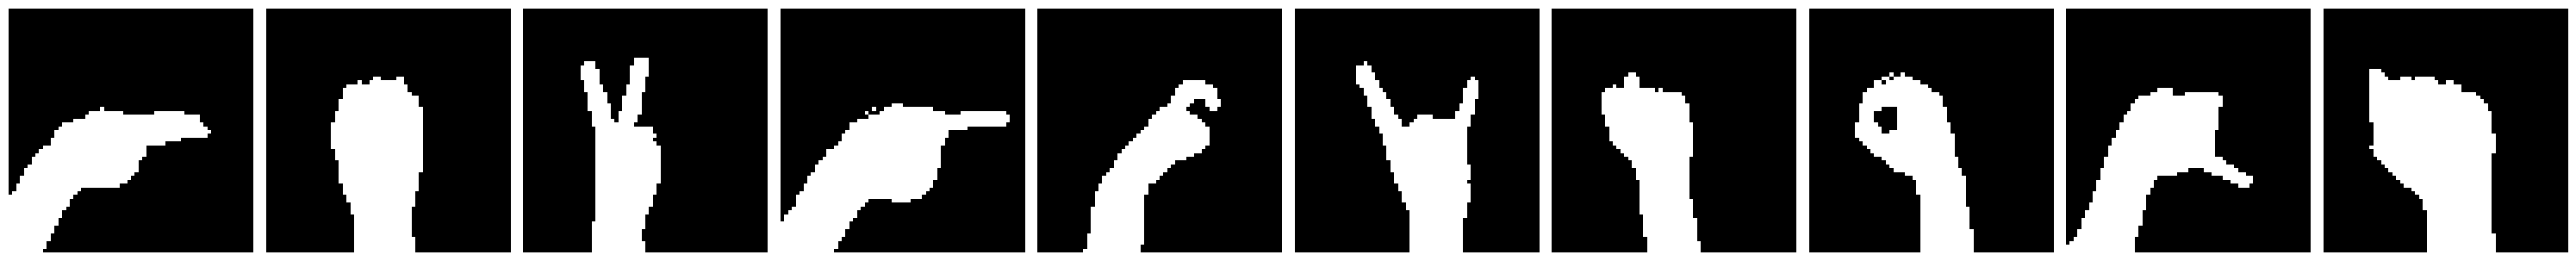

Actual labels
H   E   V   G   X   Y   T   O   J   A   (10, 64, 64, 3)


{'loss': [0.4260401725769043,
  0.001978261861950159,
  0.000979188596829772,
  0.000656941207125783,
  0.0004899280029349029,
  0.0003876877308357507,
  0.0003208146372344345,
  0.0002800489019136876,
  0.0002591682714410126,
  0.0002414760529063642],
 'accuracy': [0.9298492074012756, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0029216513503342867,
  0.0012124693021178246,
  0.0007508668932132423,
  0.0005429034936241806,
  0.0004213707579765469,
  0.0003458451246842742,
  0.00028983052470721304,
  0.00026605313178151846,
  0.00024738782667554915,
  0.00023124895233195275],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0.0005]}

In [14]:
word_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

#word_dict = {0:'One',1:'Two',2:'Three',3:'Four',4:'Five',5:'Six',6:'Seven',7:'Eight',8:'Nine',9:'Ten',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')
    
print(imgs.shape)

history2.history